In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
student = pd.read_csv('student.csv', sep=';')

In [3]:
student.shape
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
# interested columns - gender(sex), G3(final grade), acl(alcohol consumption level)

In [5]:
# rename the sex column to gender
student.rename(columns={'sex': 'gender'}, inplace=True)

In [6]:
# create new column, will be used for creating the acl column
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7

In [7]:
# create the acl column
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

In [8]:
student['acl']

0       Low
1       Low
2      High
3       Low
4       Low
       ... 
644     Low
645     Low
646     Low
647    High
648    High
Name: acl, Length: 649, dtype: object

### Confidence Intervals

In [9]:
sample_size = student.shape[0] # to see if we can use central limit theorem to cal confidence interval
sample_size

649

#### mean

In [10]:
# sample mean
sample_mean_grade = student['G3'].mean()
sample_mean_grade

np.float64(11.906009244992296)

In [11]:
# standard error
std_error_grades = student['G3'].std()/np.sqrt(sample_size)
std_error_grades

np.float64(0.12681435030794902)

In [12]:
# confidence interval of the mean, with 95% confidence level
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades)

(np.float64(11.65745768566587), np.float64(12.154560804318722))

#### proportion

In [13]:
# sample proportion of students with high alcohol consumption
high_prop = student['acl'].value_counts(normalize=True)['High']

In [14]:
# standard error
std_error_prop = np.sqrt(high_prop*(1-high_prop)/sample_size)

In [15]:
# confidence interval for the proportion, using 98% confidence level
stats.norm.interval(0.98, loc=high_prop, scale=std_error_prop)

(np.float64(0.21593666225148048), np.float64(0.2956195781183193))

### Probability calculations

In [16]:
# in a class of 10 what is the probability of finding 5 students with high level consumptions with .25 or 25% chance
stats.binom.pmf(k=5, n=10, p=.25)

np.float64(0.058399200439453146)

#### calculate many probabilities at the same time

In [17]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    ax[0].bar(x=np.arange(n+1), height=stats.binom.pmf(k=np.arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(np.arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(np.arange(n+1))
    ax[1].set_title('Cumulative distribution function')

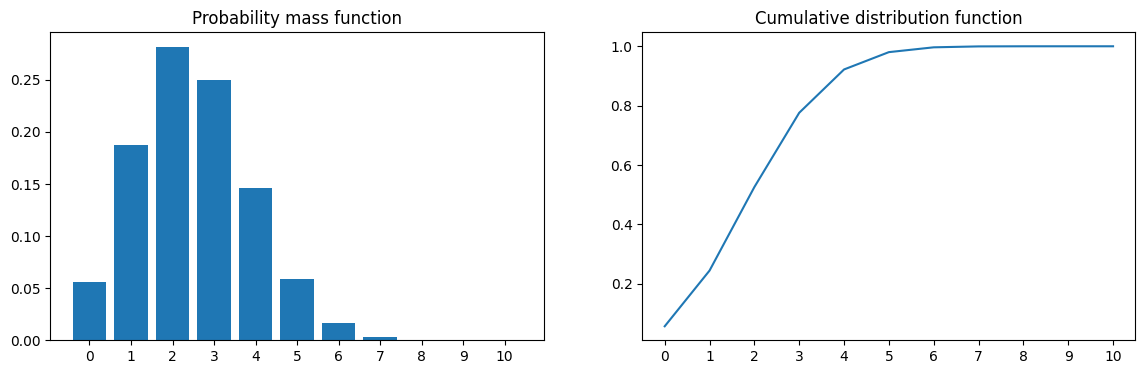

In [18]:
plot_probs_n(10)

### Hypothesis testing

In [19]:
# describe the variance
student.groupby('acl')['G3'].var()

acl
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [20]:
# bartlett's test to verify - from scipy stats
grades_low_acl = student.loc[student['acl'] == 'Low', 'G3']
grades_high_acl = student.loc[student['acl'] == 'High', 'G3']
stats.bartlett(grades_low_acl, grades_high_acl)

BartlettResult(statistic=np.float64(2.3294650190032273), pvalue=np.float64(0.12694549872289732))

In [21]:
# pvalue is higher than 0.05 means we cannot reject the null, thus 2 variance are equal for two groups

#### t-test

In [22]:
# Q: Does alcohol consumption affect academic performance?

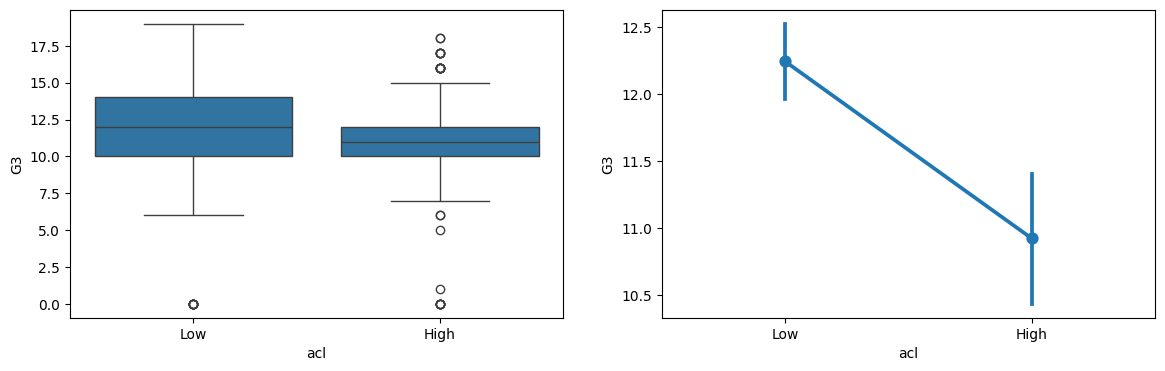

In [23]:
# describe
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x='acl', y='G3', data=student, ax=axes[0])
sns.pointplot(x='acl', y='G3', data=student, ax=axes[1]);

In [24]:
# the group with low acl has higher grades on average than the group with high acl

In [25]:
# null hypothesis - for both groups the population means of final grades are equal
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var=True)

TtestResult(statistic=np.float64(4.621320706949354), pvalue=np.float64(4.6036088303692694e-06), df=np.float64(647.0))

In [26]:
print(f'{4.6036088303692694e-06:.10f}')

0.0000046036


In [27]:
# the pvalue is very low - reject the null hypothesis
# population means in the grades are actually different when we compare these two group based on the test.

In [28]:
# since the mean for the group with high acl is less, the alcohol consumption has a negative impact on the students academic performance

### chi-squared test for contingency table

In [29]:
# Q: Do male teenagers drink more than female teenagers?

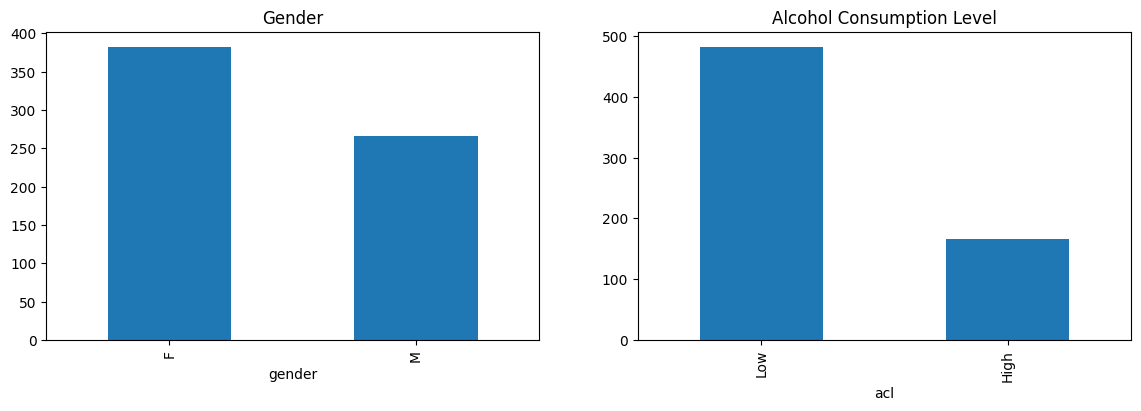

In [30]:
# describe/overview
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['acl'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level');

In [31]:
# contingency table
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


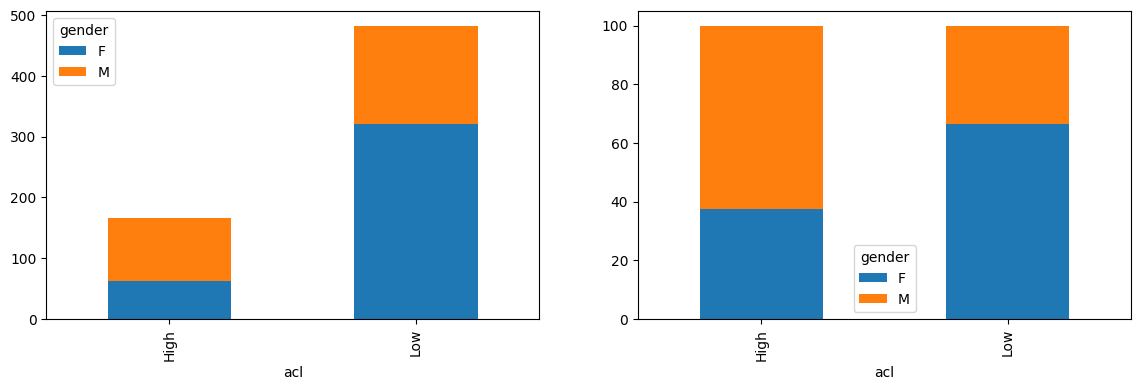

In [32]:
# stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(14,4))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0])
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1]);

In [33]:
# test
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [34]:
expected_table = pd.DataFrame(expected, index=['High', 'Low'], columns=['F', 'M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


In [35]:
# null hypothesis is that there is no relationship between these two variables in the population

In [36]:
print(f'{p_value: .10f}')

 0.0000000001


In [37]:
# the pvalue is very low. This a very good evidence in favor of the alternative hypothesis

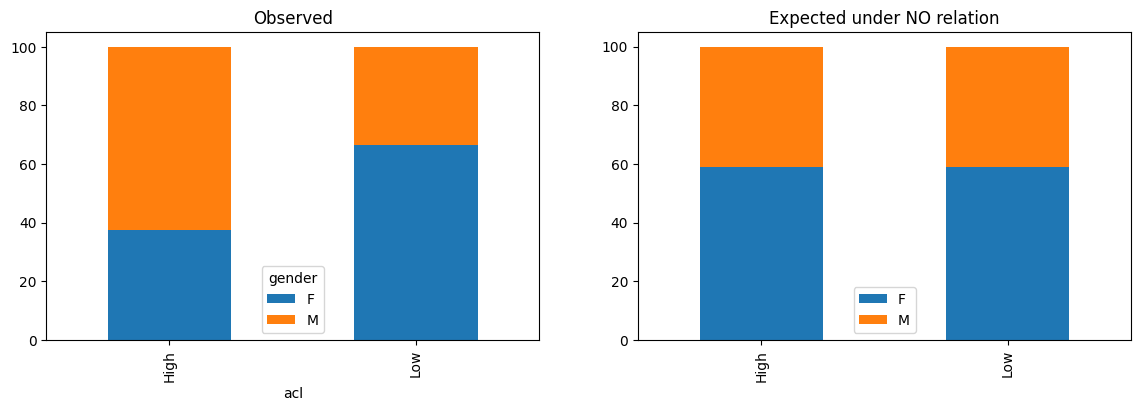

In [38]:
# to visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, title='Observed', ax=axes[0])

(100*(expected_table.T/expected_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, title='Expected under NO relation', ax=axes[1]);

In [39]:
# We can see that male teenagers drink much more